In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization, Conv2D, MaxPooling2D, Activation, Flatten, Dropout, Dense
from tensorflow.keras import backend as K
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import random
import cv2
import os
import glob

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# initial parameters
epochs = 100
lr = 1e-3
batch_size = 64
classes = 2
img_dims = (96,96,3)

In [3]:
data_train = []
labels_train = []
data_test = []
labels_test = []

In [4]:
import os
print(os.listdir('/kaggle/input/gender-npy/'))

['data_test.npy', 'trainY.npy', 'testY.npy', 'data_train.npy']


In [5]:
# Tải lại vectơ trainX từ tệp tin NumPy
data_train = np.load('/kaggle/input/gender-npy/data_train.npy')
trainY = np.load('/kaggle/input/gender-npy/trainY.npy')
data_test = np.load('/kaggle/input/gender-npy/data_test.npy')
testY = np.load('/kaggle/input/gender-npy/testY.npy')

In [ ]:
trainY = to_categorical(trainY, num_classes=2) # [[1, 0], [0, 1], [0, 1], ...]
testY = to_categorical(testY, num_classes=2)

In [7]:
# augmenting datset
aug = ImageDataGenerator(rotation_range=25, width_shift_range=0.1,
                         height_shift_range=0.1, shear_range=0.2, zoom_range=0.2,
                         horizontal_flip=True, fill_mode="nearest")

In [8]:
from keras.optimizers.schedules import ExponentialDecay
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Flatten, Dropout
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [9]:
decay_lr = ExponentialDecay(initial_learning_rate=lr, decay_steps=epochs, decay_rate=0.9)

In [10]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=img_dims)
model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(classes, activation='sigmoid'))
for layer in base_model.layers:
    layer.trainable = False


58889256/58889256 [==============================] - 0s 0us/step


In [11]:
# compile the model
opt = Adam(learning_rate=lr)
model.compile(loss="binary_crossentropy", optimizer=opt, metrics=["accuracy"])

In [12]:
H = model.fit_generator(aug.flow(data_train, trainY, batch_size=batch_size),
                        validation_data=(data_test,testY),
                        steps_per_epoch=len(data_train) // batch_size,
                        epochs=epochs, verbose=1)

/tmp/ipykernel_43/925291933.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  H = model.fit_generator(aug.flow(data_train, trainY, batch_size=batch_size),


Epoch 1/100
734/734 [==============================] - 132s 165ms/step - loss: 0.3231 - accuracy: 0.8647 - val_loss: 0.2083 - val_accuracy: 0.9192
Epoch 2/100
734/734 [==============================] - 118s 160ms/step - loss: 0.2754 - accuracy: 0.8862 - val_loss: 0.2246 - val_accuracy: 0.9053
Epoch 3/100
734/734 [==============================] - 117s 160ms/step - loss: 0.2603 - accuracy: 0.8943 - val_loss: 0.1891 - val_accuracy: 0.9256
Epoch 4/100
734/734 [==============================] - 117s 159ms/step - loss: 0.2500 - accuracy: 0.8994 - val_loss: 0.2074 - val_accuracy: 0.9156
Epoch 5/100
734/734 [==============================] - 117s 160ms/step - loss: 0.2452 - accuracy: 0.9026 - val_loss: 0.1914 - val_accuracy: 0.9245
Epoch 6/100
734/734 [==============================] - 116s 159ms/step - loss: 0.2426 - accuracy: 0.9032 - val_loss: 0.1778 - val_accuracy: 0.9314
Epoch 7/100
734/734 [==============================] - 117s 159ms/step - loss: 0.2431 - accuracy: 0.9038 - val_loss: 0

In [13]:
# save the model to disk
model.save('gender_detection4')

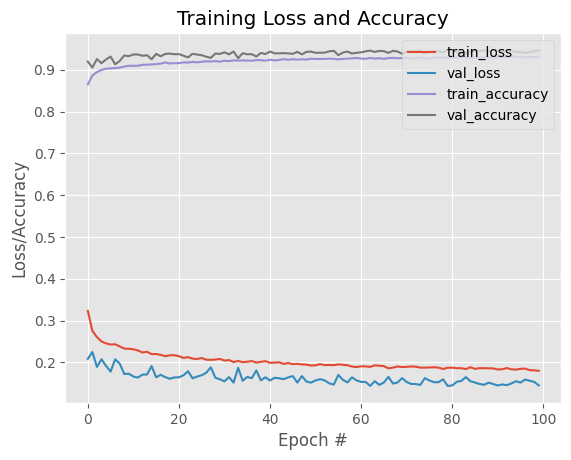

In [14]:
# plot training/validation loss/accuracy
plt.style.use("ggplot")
plt.figure()
N = epochs
plt.plot(np.arange(0,N), H.history["loss"], label="train_loss")
plt.plot(np.arange(0,N), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0,N), H.history["accuracy"], label="train_accuracy")
plt.plot(np.arange(0,N), H.history["val_accuracy"], label="val_accuracy")

plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="upper right")

# save plot to disk
plt.savefig('plot.png')